# Determination of a prospective plan for a telecom company

Let's imagine that you are in charge of the commercial department of a telecom company. You need to decide which of the two cell phone plans to advertise more. Simply put, which of the two plans is better? What if we only have data for 500 customers?

No problem. Just give the data to your fellow analyst. And that analyst is me :)

So, our task is to carry out a preliminary analysis of the cell phone plans of a telecom company on a small sample of customers. We have the data of 500 users: who they are, where they are from, what plan they use, how many calls and messages each sent in 2018. It is necessary to analyze the behavior of customers and draw a conclusion - which plan is better. Based on this conclusion, colleagues from the commercial department of the company will adjust the advertising budget.

The main steps of our project will be:

* Examining the provided data
* Data preprocessing
* Calculations and adding the results necessary for analysis
* Data analysis
* Hypothesis testing
* Formulation of main conclusions  
  
The project is made in **Jupyter Notebook**, notebook server version: 6.1.4., Python 3.7.8. The project used the **Pandas**, **MatPlotLib**, **NumPy**, **Math**, **SciPy** libraries, as well as the **IPython** module. 


# Plans description

**"Smart" plan**

1. Monthly fee: 550 rubles
2. Included 500 minutes of calls, 50 messages and 15 GB of Internet traffic
3. The cost of services in excess of the tariff package: 1. minute of conversation: 3 rubles (Telecom company always rounds up the values of minutes and megabytes. If the user spoke only 1 second, a whole minute is counted in the tariff); 2. message: 3 rubles; 3. 1 GB of Internet traffic: 200 rubles.  
  
**"Ultra" plan**

1. Monthly fee: 1950 rubles
2. Included 3000 minutes of calls, 1000 messages and 30 GB of internet traffic
3. The cost of services in excess of the tariff package: 1. minute of conversation: 1 ruble; 2. message: 1 ruble; 3. 1 GB of Internet traffic: 150 rubles.

## Examining the provided data

In [1]:
# Import all required libraries and modules.
from math import factorial
import math as mt

import pandas as pd
from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy import stats as st
from scipy.stats import levene
# Read the datasets.
data_calls = pd.read_csv('calls.csv')
data_internet = pd.read_csv('internet.csv', index_col=0)
data_messages = pd.read_csv('messages.csv')
data_tariffs = pd.read_csv('tariffs.csv')
data_users = pd.read_csv('users.csv')

In [2]:
# Let's review all the datasets.
# Begin with data_calls.
display(data_calls.head(5))
data_calls.info()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [3]:
# Now data_internet.
display(data_internet.head(5))
data_internet.info()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


In [4]:
# Now data_messages.
display(data_messages.head(5))
data_messages.info()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [5]:
# Now data_tariffs.
display(data_tariffs)
data_tariffs.info()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [6]:
# And data_users.
display(data_users.head(5))
data_users.info()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


### Conclusion

We are provided with 5 datasets. At first glance, the datasets are in excellent condition.

**Let's formulate ideas for data preprocessing:**

**data_calls table**
* Convert the data format in the **call_date** column to `datetime`
* Round the data in the **duration** column and convert it to `int` format

**data_internet table**
* Convert the data format in the **session_date** column to `datetime`

**data_messages table**
* Convert the data format in the **message_date** column to `datetime`

**data_users table**
* Convert the data format in the **reg_date** and **churn_date** columns to `datetime`
* Check the **city** column for duplicates

## Data preprocessing

In [7]:
# Change data type from object to datetime
# in the columns of our tables that have dates.
data_calls['call_date'] = pd.to_datetime(
    data_calls['call_date'], 
    format='%Y-%m-%d'
)
data_internet['session_date'] = pd.to_datetime(
    data_internet['session_date'], 
    format='%Y-%m-%d'
)
data_messages['message_date'] = pd.to_datetime(
    data_messages['message_date'], 
    format='%Y-%m-%d'
)
data_users[['churn_date', 'reg_date']] = data_users[[
    'churn_date', 'reg_date']].apply(
    pd.to_datetime, format='%Y-%m-%d'
)

# In the data_calls table, round the values in the duration column
# to integer values and change the format to int.
data_calls['duration'] = np.ceil(data_calls['duration']).astype(int)
display(data_calls)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000
...,...,...,...,...
202602,1499_215,2018-12-26,1,1499
202603,1499_216,2018-10-18,19,1499
202604,1499_217,2018-11-10,11,1499
202605,1499_218,2018-10-06,5,1499


In [8]:
# It is possible to have duplicates in the city column of
# data_users table. Let's check it out.
display(data_users['city'].value_counts().index.sort_values())
# There are no duplicates.

Index(['Архангельск', 'Астрахань', 'Балашиха', 'Барнаул', 'Белгород', 'Брянск',
       'Владивосток', 'Владикавказ', 'Владимир', 'Волгоград', 'Волжский',
       'Вологда', 'Воронеж', 'Грозный', 'Екатеринбург', 'Иваново', 'Ижевск',
       'Иркутск', 'Казань', 'Калининград', 'Калуга', 'Кемерово', 'Киров',
       'Кострома', 'Краснодар', 'Красноярск', 'Курган', 'Курск', 'Липецк',
       'Магнитогорск', 'Махачкала', 'Москва', 'Мурманск', 'Набережные Челны',
       'Нижневартовск', 'Нижний Новгород', 'Нижний Тагил', 'Новокузнецк',
       'Новороссийск', 'Новосибирск', 'Омск', 'Оренбург', 'Орёл', 'Пенза',
       'Пермь', 'Петрозаводск', 'Подольск', 'Ростов-на-Дону', 'Рязань',
       'Самара', 'Санкт-Петербург', 'Саранск', 'Саратов', 'Севастополь',
       'Смоленск', 'Сочи', 'Ставрополь', 'Стерлитамак', 'Сургут', 'Тамбов',
       'Тверь', 'Тольятти', 'Томск', 'Тула', 'Тюмень', 'Улан-Удэ', 'Ульяновск',
       'Уфа', 'Хабаровск', 'Химки', 'Чебоксары', 'Челябинск', 'Череповец',
       'Чита', 'Я

In [9]:
# Check the data for anomalies.
# Let's write the describe_me function, which allows us to quickly analyze.
# Function arguments:
# dataset - dataset
# column - dataset column
# units - data units of the column.
def describe_me(dataset, column, units):
    display(dataset[column].describe())
    display(dataset[column].value_counts())
    dataset.plot(kind='hist', y=column, bins=70, grid=True, figsize=(15,5))
    plt.title('Histogram for the ' + str(column) + ' column')
    plt.xlabel(units)
    plt.ylabel('Frequency')
    plt.show()
    dataset.plot(kind='box', y=column, figsize=(15,5))
    plt.title('Boxplot for the '+ str(column) + ' column')
    plt.show()

count    202607.000000
mean          7.158198
std           5.959173
min           0.000000
25%           2.000000
50%           6.000000
75%          11.000000
max          38.000000
Name: duration, dtype: float64

0     39613
7     11510
6     11457
5     11411
8     11272
9     10973
4     10918
3     10362
10    10186
11     9385
2      9194
12     8448
1      8402
13     7486
14     6554
15     5505
16     4551
17     3671
18     2984
19     2411
20     1806
21     1304
22      975
23      720
24      468
25      363
26      257
27      151
28      104
29       56
30       39
31       30
32       17
33       10
35        5
34        3
37        2
36        2
38        2
Name: duration, dtype: int64

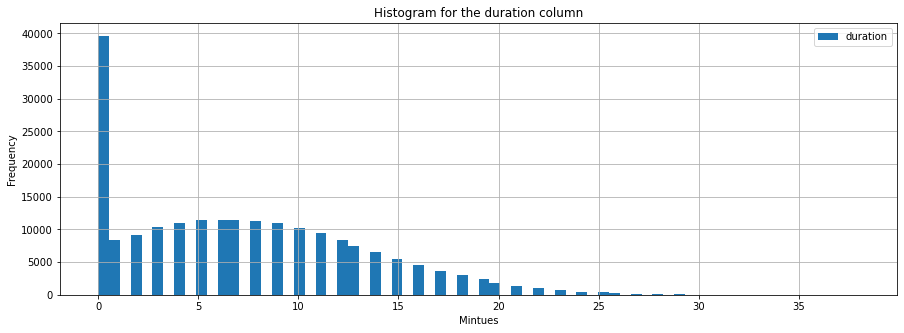

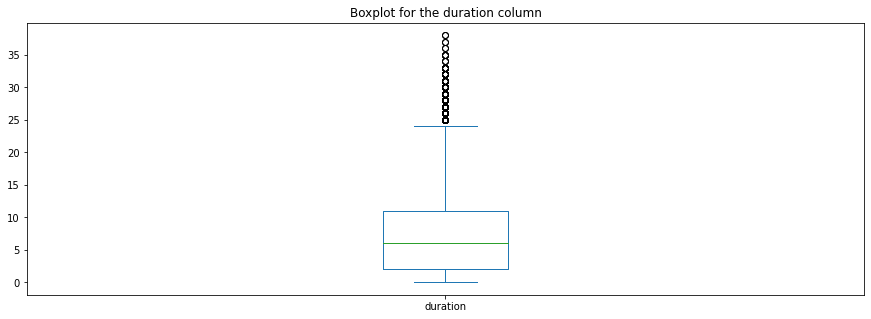

In [10]:
# Let's check the data on the duration of calls.
describe_me(data_calls, 'duration', 'Mintues')

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

0.00      19598
335.91        9
447.30        9
197.56        9
199.11        8
          ...  
643.43        1
973.04        1
834.51        1
777.30        1
23.72         1
Name: mb_used, Length: 70003, dtype: int64

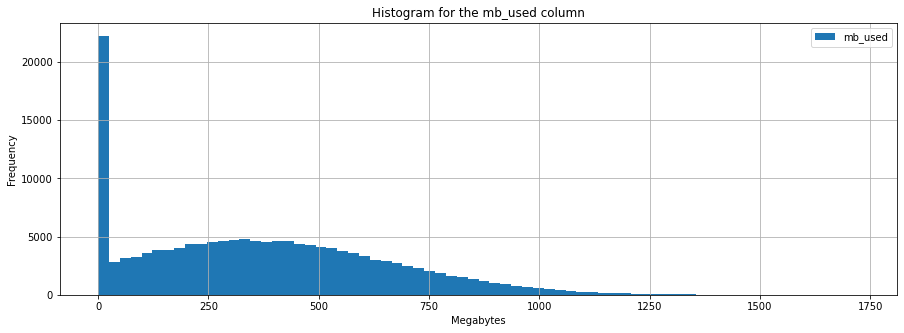

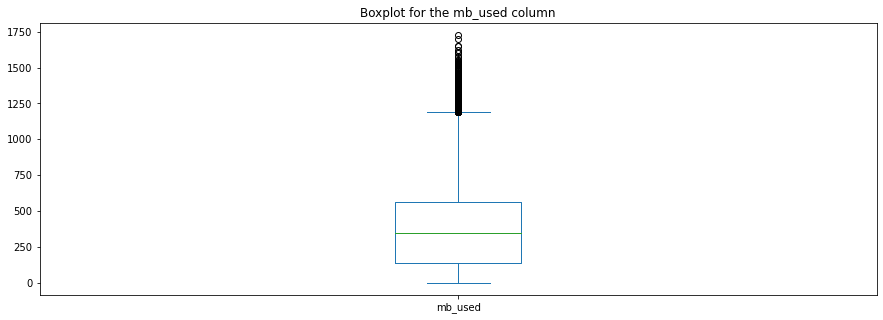

In [11]:
# Check the data on the use of Internet traffic.
describe_me(data_internet, 'mb_used', 'Megabytes')

In [12]:
# Let's review what we've done.
datasets = [data_calls, data_internet, data_messages, data_tariffs, data_users]
for i in datasets:
    display(i)
    i.info()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000
...,...,...,...,...
202602,1499_215,2018-12-26,1,1499
202603,1499_216,2018-10-18,19,1499
202604,1499_217,2018-11-10,11,1499
202605,1499_218,2018-10-06,5,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int64         
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 5.7+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaT,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaT,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaT,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Conclusion

**Missing values**

* There are no missing values in the **data_calls**, **data_internet**, **data_messages** and **data_tariffs** datasets. In the **data_users** table, there are missing values in the **churn_date** column, but we do not need to replace or get rid of them, since they make sense (the plan was still in effect at the time the data was uploaded).

* The **data_calls** dataset contains null values in the **duration** column. This is not an error, but a missed call.

**Changing data types**

* In the **data_calls**, **data_internet**, **data_messages** and **data_users** tables, the date format is `object`. Let's change it to `datetime`.

* In the **data_calls** table, round the minutes to integer values and change the format to `int`.

**Duplicates**

The only data field where it makes sense to search for duplicates is the **city** column of the **data_users** table. Checking showed that there are no duplicates.

**Study data for anomalies**

Examined data in tables **data_calls** and **data_internet** for abnormal values (columns **duration** and **mb_used** respectively). For study, the function `describe_me` was created, containing the methods `describe()`, `value_counts()`, `plot`. Histograms and boxplots of data are constructed. The analysis showed that in both tables the data is distributed abnormally - there is a large peak at zero. Otherwise, histograms resemble a right-skewed normal distribution.
  
The null values in the **data_calls** table were most likely formed during the registration of missed calls. Such values appear in the vast majority of users. Moreover, colleagues drew our attention to this when transferring datasets to complete our task. The maximum value is 38 minutes. This is a very real value. Well, such data can really exist, and they reflect reality, so it is not advisable to delete / replace them.
  
Null values in the **data_internet** table are also found in the vast majority of users. Most likely, they were formed because during these sessions such a small amount of traffic was consumed (a few kilobytes) that a value equal to zero got into the archive (especially since it is fixed in megabytes).
The maximum value is 1724 MB. This value is very real.
Zero values in this sample may indeed exist, and they reflect reality, so it is not practical to remove/replace them.

## Calculations and adding the results necessary for analysis

In [13]:
# For further work, we need to join the tables.
# For ease of joining, let's give table columns more specific names.
data_calls = data_calls.rename(columns={'id':'call_id'})
data_internet = data_internet.rename(columns={'id':'session_id'})
data_messages = data_messages.rename(columns={'id':'message_id'})
data_tariffs = data_tariffs.rename(columns = {'tariff_name':'tariff'})

In [14]:
# Let's merge the data_users and data_tariffs tables.
data_users_w_tariffs = data_users.merge(data_tariffs, on='tariff')
display(data_users_w_tariffs)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,1000,30720,3000,1950,150,1,1
2,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,1000,30720,3000,1950,150,1,1
3,1013,36,NaT,Иваново,Борис,Андреенко,2018-11-14,ultra,1000,30720,3000,1950,150,1,1
4,1016,58,NaT,Омск,Марица,Сазонова,2018-11-21,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1494,62,NaT,Омск,Ренат,Андропов,2018-08-17,smart,50,15360,500,550,200,3,3
496,1496,36,NaT,Вологда,Трифон,Блохин,2018-01-27,smart,50,15360,500,550,200,3,3
497,1497,32,NaT,Челябинск,Каролина,Агеева,2018-10-09,smart,50,15360,500,550,200,3,3
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,50,15360,500,550,200,3,3


In [15]:
# Create a pivot table according to the data_calls table.
# Reflect in it the number of calls made and minutes spent
# monthly conversations per user.
# First add a column with the month of the call.
data_calls['month'] = pd.DatetimeIndex(data_calls['call_date']).month
# Create a pivot table.
data_calls_by_user = data_calls.pivot_table(
    index=['user_id','month'], 
    values=['duration'], 
    aggfunc=['count','sum']).reset_index()
# Rename names of the columns.
data_calls_by_user.columns = [
    'user_id', 
    'month', 
    'number_of_calls', 
    'total_call_duration'
]
display(data_calls_by_user)

,user_id,month,number_of_calls,total_call_duration
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466
...,...,...,...,...
3169,1498,10,41,247
3170,1499,9,9,70
3171,1499,10,68,449
3172,1499,11,74,612


In [16]:
# Calculate for each user the number of sent
# messages by month.
# Add a column with the month of the call 
# to the data_messages dataset.
data_messages['month'] = pd.DatetimeIndex(
    data_messages['message_date']
).month
# Create a pivot table.
data_messages_by_user = data_messages.pivot_table(
    index=['user_id', 'month'], 
    values='message_id',
    aggfunc='count').reset_index()
# Rename the column.
data_messages_by_user.columns=['user_id', 'month', 'messages_number']
display(data_messages_by_user)

,user_id,month,messages_number
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


In [17]:
# Calculate the volume for each user
# of used traffic by month.
# Add a column with the month of the session 
# to the data_internet dataset.
data_internet['month'] = pd.DatetimeIndex(
    data_internet['session_date']
).month
# Create a pivot table for the dataset data_internet.
data_internet_by_user = data_internet.pivot_table(
    index=['user_id', 'month'], 
    values='mb_used',
    aggfunc='sum').reset_index()
# Rename the column.
data_internet_by_user.columns=['user_id', 'month', 'gb_used_total']
# Let's round up megabytes to gigabytes.
def gb(mb):
    result = mt.ceil(mb / 1024)
    return result

data_internet_by_user['gb_used_total'] = data_internet_by_user[
    'gb_used_total'].apply(gb)
display(data_internet_by_user)

,user_id,month,gb_used_total
0,1000,5,3
1,1000,6,23
2,1000,7,14
3,1000,8,14
4,1000,9,15
...,...,...,...
3198,1498,10,21
3199,1499,9,2
3200,1499,10,18
3201,1499,11,18


In [18]:
# Let's merge the data_users_w_tariffs, 
# data_calls_by_user, data_messages_by_user and 
# data_internet_by_user tables.
data_by_user = data_calls_by_user.merge(
    data_messages_by_user, on=['user_id','month'], how='outer')
data_by_user_internet = data_by_user.merge(
    data_internet_by_user, on=['user_id','month'], how='outer')
data = data_by_user_internet.merge(
    data_users_w_tariffs, on='user_id', how='left')
display(data)

,user_id,month,number_of_calls,total_call_duration,messages_number,gb_used_total,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22.0,159.0,22.0,3.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,43.0,172.0,60.0,23.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,47.0,340.0,75.0,14.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,52.0,408.0,81.0,14.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,58.0,466.0,57.0,15.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,9,NaN,NaN,32.0,17.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3210,1489,10,NaN,NaN,21.0,20.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3211,1489,11,NaN,NaN,20.0,18.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3212,1489,12,NaN,NaN,35.0,17.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3


In [19]:
# In the new data table, get rid of missing values 
# in the number_of_calls columns,
# messages_number, gb_used_total.
# In the same columns, change the data type 
# to int (after replacing missing values with 0).
data = data.fillna(
    {
        'total_call_duration':0,
        'number_of_calls':0, 
        'messages_number':0, 
        'gb_used_total':0
    }
).astype(
    {
        'total_call_duration': 'int',
        'number_of_calls':'int',
          'messages_number':'int', 
          'gb_used_total':'int'
    }
        )
# And now we will translate in the mb_per_month_included Megabytes column
# to Gigabytes (renaming the column name as well).
data['mb_per_month_included'] = (
    data['mb_per_month_included'] / 1024
).astype('int')
data = data.rename(
    columns={'mb_per_month_included':'gb_per_month_included'}
)
display(data)

,user_id,month,number_of_calls,total_call_duration,messages_number,gb_used_total,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22,159,22,3,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1
1,1000,6,43,172,60,23,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1
2,1000,7,47,340,75,14,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1
3,1000,8,52,408,81,14,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1
4,1000,9,58,466,57,15,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,9,0,0,32,17,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15,500,550,200,3,3
3210,1489,10,0,0,21,20,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15,500,550,200,3,3
3211,1489,11,0,0,20,18,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15,500,550,200,3,3
3212,1489,12,0,0,35,17,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15,500,550,200,3,3


In [20]:
# Let's calculate the monthly revenue from each user.
# To do this, write the earning function.
def earning(row):
    duration_used = row['total_call_duration']
    messages_used = row['messages_number']
    gb_used = row['gb_used_total']
    minutes_limit = row['minutes_included']
    messages_limit = row['messages_included']
    gb_limit = row['gb_per_month_included']
    monthly_fee = row['rub_monthly_fee']
    rub_per_minute = row['rub_per_minute']
    rub_per_message = row['rub_per_message']
    rub_per_gb = row['rub_per_gb']
    
    if duration_used <= minutes_limit:
        minutes_earnings = 0
    else: 
        minutes_earnings = (
            (duration_used - minutes_limit) * rub_per_minute
        )
    
    if messages_used <= messages_limit:
        messages_earnings = 0
    else: 
        messages_earnings = (
            (messages_used - messages_limit) * rub_per_message
        )
    
    if gb_used <= gb_limit:
        gb_earnings = 0
    else: 
        gb_earnings = (gb_used - gb_limit) * rub_per_gb
    
    total_earnings = (minutes_earnings + messages_earnings + 
    gb_earnings + monthly_fee)
    
    return total_earnings

# The function is ready. 
# Add a new column and enter the results of the calculation into it.
data['rub_earnings'] = data.apply(earning, axis=1)
display(data)

,user_id,month,number_of_calls,total_call_duration,messages_number,gb_used_total,age,churn_date,city,first_name,...,reg_date,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,rub_earnings
0,1000,5,22,159,22,3,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30,3000,1950,150,1,1,1950
1,1000,6,43,172,60,23,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30,3000,1950,150,1,1,1950
2,1000,7,47,340,75,14,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30,3000,1950,150,1,1,1950
3,1000,8,52,408,81,14,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30,3000,1950,150,1,1,1950
4,1000,9,58,466,57,15,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30,3000,1950,150,1,1,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,9,0,0,32,17,35,NaT,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15,500,550,200,3,3,950
3210,1489,10,0,0,21,20,35,NaT,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15,500,550,200,3,3,1550
3211,1489,11,0,0,20,18,35,NaT,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15,500,550,200,3,3,1150
3212,1489,12,0,0,35,17,35,NaT,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15,500,550,200,3,3,950


### Conclusion

We have carried out extensive work on data compilation and calculations:

1. For the convenience of working with data and joining of tables, the columns in the original datasets have been renamed. More specific names are given. **For example,** in the **data_calls** dataset, the **id** column has been renamed to **call_id**. In the **data_internet** dataset, the **id** column has been renamed to **session_id**.
2. In tables **data_calls**, **data_internet**, **data_messages** columns with months of operations are added. The tables have been rearranged. Pivot tables are made with a breakdown by users and months. For convenience, multi-index columns have been renamed in the resulting pivot tables. Note that in the summary table for the **data_internet** dataset, using the **gb** function, the used megabytes are converted to gigabytes rounded up.
3. All tables are merged with each other by the **user_id** column. The resulting **NaN-values** are replaced by 0. All data of the **float** format is converted to the **int** format. **mb_per_month_included** column data converted to gigabytes. The name of this column has been renamed to **gb_per_month_included**.
4. We created the earnings function, which allowed us to calculate the monthly revenue from each user. The calculation results are presented in the **rub_earnings** column.

Let's start analyzing the data.

## Data analysis

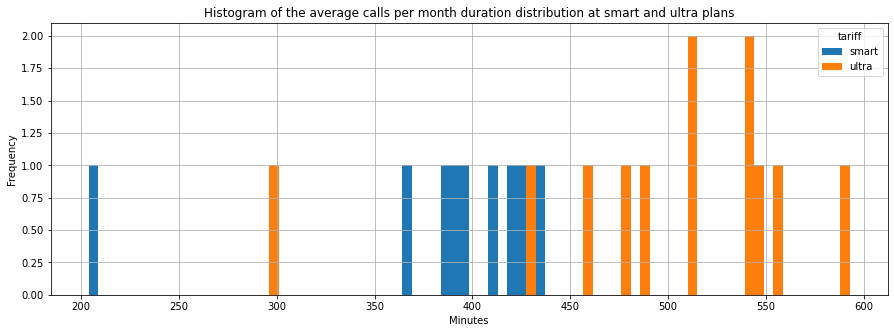

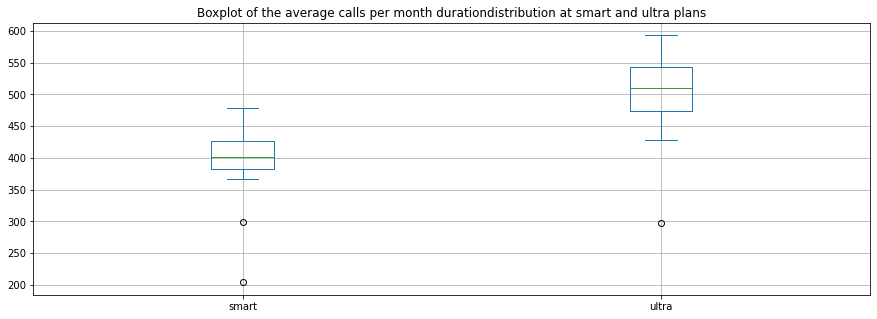

,smart,ultra
month,,
1,203.852941,428.111111
2,298.689655,297.125000
3,390.051948,489.648649
4,367.133929,458.018182
5,387.361702,510.328358
6,395.640244,479.702381
7,408.353234,545.791209
8,421.468085,510.775701
9,428.611538,539.443478


In [21]:
# To analyze the data, let's create a series of pivot tables.
# Calculate the average value of minutes spent
# conversations per month for each plan.
data_grouped_call = data.pivot_table(
    index='month', columns='tariff',
    values='total_call_duration'
)
# Now calculate the variance and standard deviation.
variance_call = pd.Series(
    {'smart':np.var(data_grouped_call['smart'], ddof=1),
     'ultra':np.var(data_grouped_call['ultra'], ddof=1)},
      name='Variance'
)
standard_deviation_call = pd.Series(
    {'smart':np.std(data_grouped_call['smart'], ddof=1),
     'ultra':np.std(data_grouped_call['ultra'], ddof=1)},
      name='Standard deviation')
mean_call = pd.Series({'smart':data_grouped_call['smart'].mean(),
                                'ultra':data_grouped_call['ultra'].mean()},
                               name='Mean value')
# Build a histogram of the average duration distribution
# calls per month at smart and ultra plans.
data_grouped_call.plot(kind='hist',
                  grid=True,
                  bins=80,
                  figsize=(15,5)
                 )
plt.title('Histogram of the average calls per month duration' +
          ' distribution at smart and ultra plans')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
plt.show()
data_grouped_call.plot(kind='box',
                  grid=True,
                  figsize=(15,5)
                 )
plt.title('Boxplot of the average calls per month duration' + 
          'distribution at smart and ultra plans')
plt.show()
# For clarity, add data_grouped_call to the table
# variance and standard deviation values.
parameters_call = [variance_call, standard_deviation_call, mean_call]
for i in parameters_call:
    data_grouped_call = data_grouped_call.append(i)
display(data_grouped_call)


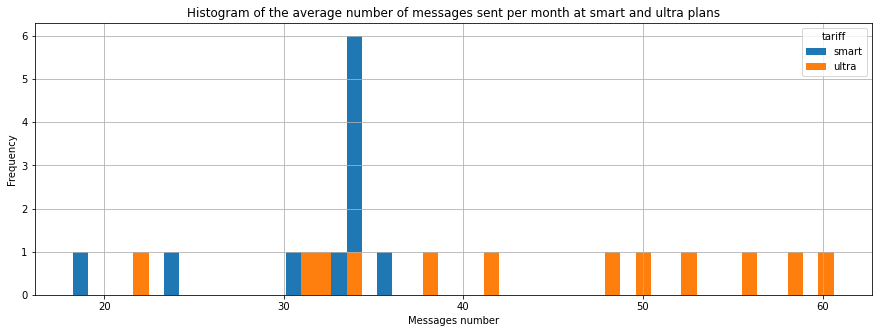

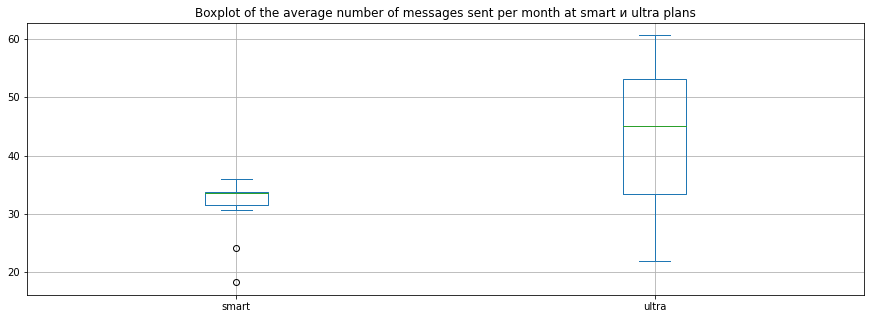

,smart,ultra
month,,
1,18.235294,33.777778
2,24.086207,21.958333
3,31.857143,32.297297
4,30.741071,31.563636
5,33.773050,37.850746
6,33.402439,41.726190
7,33.751244,49.846154
8,33.638298,48.439252
9,33.638462,52.286957


In [22]:
# Calculate the average value of sent messages per month
# for each plan.
data_grouped_message = data.pivot_table(
    index='month', columns='tariff',
    values='messages_number'
)
# Now calculate the variance and standard deviation.
variance_message = pd.Series(
    {'smart':np.var(data_grouped_message['smart'], ddof=1),
     'ultra':np.var(data_grouped_message['ultra'], ddof=1)},
      name='Variance'
)
standard_deviation_message = pd.Series(
    {'smart':np.std(data_grouped_message['smart'], ddof=1),
     'ultra':np.std(data_grouped_message['ultra'], ddof=1)},
      name='Standard deviation')
mean_message = pd.Series(
    {'smart':data_grouped_message['smart'].mean(),
     'ultra':data_grouped_message['ultra'].mean()},
      name='Mean value')
# Build a histogram of the average duration distribution
# calls per month at smart and ultra plans.
data_grouped_message.plot(kind='hist',
                  grid=True,
                  bins=50,
                  figsize=(15,5)
                 )
plt.title('Histogram of the average number' +
           ' of messages sent per month at smart and ultra plans')
plt.xlabel('Messages number')
plt.ylabel('Frequency')
plt.show()
data_grouped_message.plot(kind='box',
                  grid=True,
                  figsize=(15,5)
                 )
plt.title('Boxplot of the average number' +  
          ' of messages sent per month at smart и ultra plans')
plt.show()
# For clarity, add data_grouped_message to the table
# variance and standard deviation values.
parameters_message = [
    variance_message, 
    standard_deviation_message, 
    mean_message
]
for i in parameters_message:
    data_grouped_message = data_grouped_message.append(i)
display(data_grouped_message)

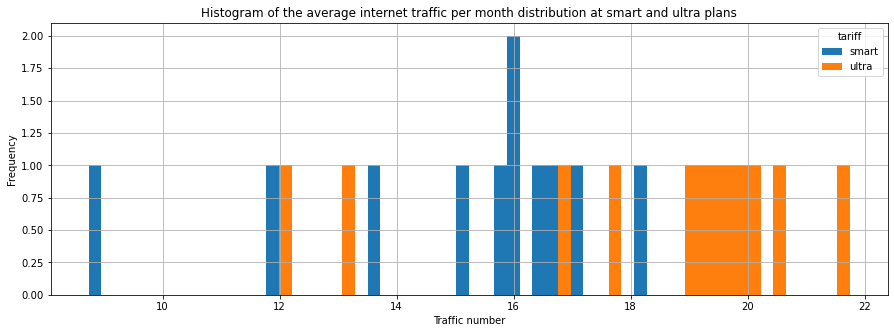

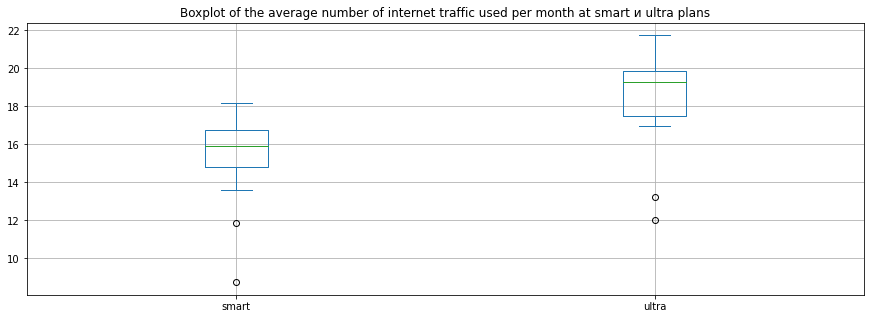

,smart,ultra
month,,
1,8.735294,13.222222
2,11.844828,12.000000
3,15.233766,17.648649
4,13.625000,16.963636
5,15.907801,19.373134
6,15.951220,18.940476
7,15.875622,20.505495
8,16.736170,19.598131
9,16.392308,19.243478


In [23]:
# Calculate the average value of the used Internet traffic
# per month for each plan.
data_grouped_gb = data.pivot_table(
    index='month', columns='tariff',
    values='gb_used_total'
)
# Now calculate the variance and standard deviation.
variance_gb = pd.Series(
    {'smart':np.var(data_grouped_gb['smart'], ddof=1),
     'ultra':np.var(data_grouped_gb['ultra'], ddof=1)}, 
      name='Variance')
standard_deviation_gb = pd.Series(
    {'smart':np.std(data_grouped_gb['smart'], ddof=1),
     'ultra':np.std(data_grouped_gb['ultra'], ddof=1)},
      name='Standard deviation')
mean_gb = pd.Series(
    {'smart':data_grouped_gb['smart'].mean(),
     'ultra':data_grouped_gb['ultra'].mean()},
      name='Mean value')
# Build a histogram of the average internet traffic per month 
# distribution at smart and ultra plans.
data_grouped_gb.plot(kind='hist',
                  grid=True,
                  bins=60,
                  figsize=(15,5)
                 )
plt.title('Histogram of the average internet traffic per month' + 
          ' distribution at smart and ultra plans')
plt.xlabel('Traffic number')
plt.ylabel('Frequency')
plt.show()
data_grouped_gb.plot(kind='box',
                  grid=True,
                  figsize=(15,5)
                 )
plt.title('Boxplot of the average number' +  
          ' of internet traffic used per month at smart и ultra plans')
plt.show()
# For clarity, add data_grouped_gb to the table
# variance and standard deviation values.
parameters_gb = [variance_gb, standard_deviation_gb, mean_gb]
for i in parameters_gb:
    data_grouped_gb = data_grouped_gb.append(i)
display(data_grouped_gb)

### Conclusion

We did an analysis of the behavior of users of Smart and Ultra plans for the presented sample. Sample analysis showed the following.

<u>**Smart Plan:**</u>

**1. Call duration**  
Smart plan users talk 365 minutes a month on average per year, which does not exceed the plan limit. Most often they talk between 340 and 410 minutes per month. The users of the plan talked the least in January (193 minutes). Most in December (451 minutes). It is curious that in general, starting from January, the average number of minutes of conversation per month is certainly growing and reaches its peak in December. The maximum value in December can be explained by the impending New Year holidays and, as a result, the increased need of people for cellular communications, which is necessary to solve the work tasks that have accumulated by the end of the year, as well as for congratulations on the New Year :)
The minimum value in January can be explained by a decrease in the need for cellular communications due to the long New Year holidays.
The variance was 4599 square min. The standard deviation was 67.8 minutes. The histogram is skewed to the left, indicating that the median is greater than the mean.
  
**2. SMS messages**  
Smart plan users send 31 messages per month on average per year, which does not exceed the maximum plan value. Most often they send 33-34 messages per month. Least of all users of the plan sent messages in January (18 messages). Most of all in December (36 messages). The reasons why the minimum and maximum values were shown in January and December, respectively, are similar to the reasons described above in the Call Duration section.
The variance was 26 square messages. The standard deviation was 5.1 messages. The histogram is skewed to the left, indicating that the median is greater than the mean.

**3. Internet traffic**  
Users of the Smart plan on average use 15.2 GB of Internet traffic per month, which exceeds the plan limit. Most often they use 15-16 GB of Internet traffic per month. The users of the plan used traffic least of all in January (8.7 GB). Most of all in December (18.2 GB). The reasons why the minimum and maximum values were shown in January and December, respectively, are similar to the reasons described above in the Call Duration section.
The variance was 6.9 square GB. The standard deviation was 2.6 GB. The histogram is skewed to the left, indicating that the median is greater than the mean.
  
  <u>**Ultra Plan:**</u>

**1. Call duration**  
Users of the Ultra plan on average talk 468 minutes per month per year, which does not exceed the maximum plan limit. Most often they talk between 475 and 510 minutes per month. The users of the plan talked the least in February (280 minutes). Most of all in December (560 min). The maximum value in December can still be explained by the impending New Year holidays. It is difficult to explain the average values of other months at this stage of the study. It should be noted that users use no more than 20% of the total plan limit.
The variance amounted to 5342.7 square minutes. The standard deviation was 73.1 min. The histogram is skewed to the left, indicating that the median is greater than the mean.
  
**2. SMS messages**  
Users of the Ultra plan send 44 messages per month on average per year, which does not exceed the maximum plan limit. Most often they send 32 or 50 messages per month. The users of the plan sent messages the least in February (22 messages). Most of all in December (61 messages).
The variance was 151.8 square messages. The standard deviation was 12.3 messages. The histogram turned out to be skewed to the right, which means that the median is less than the mean.

**3. Internet traffic**  
Users of the Ultra plan on average, use 18.3 GB of Internet traffic per month, which does not exceed the maximum plan limit. Most often they use 19-20 GB of Internet traffic per month. The users of the plan used traffic the least in February (12 GB). Most of all in December (21.7 GB).
The variance was 8.5 square GB. The standard deviation was 2.9 GB. The histogram is skewed to the left, indicating that the median is greater than the mean.

## Hypothesis testing

In [24]:
# Does the average revenue of users of Ultra and Smart plans differ?
# We have two populations (Ultra, Smart).
# Let's compare their averages.
# Prepare data arrays.
# Let's start with the revenue of users of the Smart plan.
data_smart = data.loc[data['tariff'] == 'smart', 'rub_earnings']
# Calculate the average value of the sample.
data_smart_mean = data_smart.mean()
# Now the revenue of users of the Ultra plan.
data_ultra = data.loc[data['tariff'] == 'ultra', 'rub_earnings']
# Calculate the average value of the sample.
data_ultra_mean = data_ultra.mean()
print('Average value of revenue of',
       'Smart plan users of this sample:', data_smart_mean)
print('Average value of revenue of',
      'Ultra plan users of this sample:', data_ultra_mean)
# Compare sample variances.
# This must be done in order to understand
# whether two populations have
# approximately the same variances. Let's use the Levene test.
# Let us formulate the null hypothesis: the variances of the two populations 
# are equal.
# Let's formulate an alternative hypothesis:
# the variances of the two populations are different.
# alpha value will be 0.05
alpha = .05
stat, p = levene(data_smart, data_ultra)
print()
print('p-value:', p)
if p < alpha:
    print('Reject the null hypothesis. equal_var=False')
else:
    print('Failed to reject the null hypothesis.' + 
          ' equal_var=True')

# Let's formulate the null hypothesis: the average revenue of users
# Ultra and Smart plan do not differ.
# Let's formulate an alternative hypothesis: average revenues
# of Ultra and Smart plan users are different.
# Set the critical theshold of statistical significance.
alpha = .05
results = st.ttest_ind(data_smart, data_ultra, equal_var=False)
print()
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print('Reject the null hypothesis')
else:
    print('Failed to reject the null hypothesis')

Average value of revenue of Smart plan users of this sample: 1289.9735307312696
Average value of revenue of Ultra plan users of this sample: 2070.1522842639592

p-value: 1.8783148636310733e-122
Reject the null hypothesis. equal_var=False

p-value: 4.2606313931076085e-250
Reject the null hypothesis


In [25]:
# Does the average revenue of users from Moscow differ
# from the average revenue of users in other regions?
# We have two populations (Moscow, other cities).
# Let's compare their averages.
# Prepare data arrays.
# Let's start with the revenue of users living in Moscow.
data_moscow = data.loc[data['city'] == 'Москва', 'rub_earnings']
# Calculate the average values of the sample.
data_moscow_mean = data_moscow.mean()
# Other cities users revenue.
data_other = data.loc[data['city'] != 'Москва', 'rub_earnings']
# Calculate the average values of the sample.
data_other_mean = data_other.mean()
print('Average value of revenue of',
      'clients living in Moscow:', data_moscow_mean)
print('Average value of revenue of' ,
      ' clients living in other cities:', data_other_mean)
# Compare sample variances. It needs to be done
# to see if two populations have
# approximately the same variances. Let's use the Levene test.
# Let us formulate the null hypothesis: the variances of the two populations
# are equal.
# Let us formulate an alternative hypothesis: the variances of the two populations
# are different.
# alpha value will be 0.05
alpha = .05
stat, p = levene(data_moscow, data_other)
print()
print('p-value:', p)
if p < alpha:
    print('Reject the null hypothesis. equal_var=False')
else:
    print('Failed to reject the null hypothesis.',
          ' equal_var=True')
# Let's formulate the null hypothesis: the average revenue of users
# living in Moscow and in other regions do not differ.
# Let's formulate an alternative hypothesis: the average revenue of users,
# living in Moscow and in other regions differ.
# Set the critical threshold of statistical significance
alpha = .05
results = st.ttest_ind(data_moscow, data_other, equal_var=False)
print()
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print('Reject the null hypothesis')
else:
    print('Failed to reject the null hypothesis')

Average value of revenue of clients living in Moscow: 1546.7135842880523
Average value of revenue of  clients living in other cities: 1524.9362274298885

p-value: 0.014082487123270156
Reject the null hypothesis. equal_var=False

p-value: 0.5257376663729298
Failed to reject the null hypothesis


### Conclusion

Our task was to test two hypotheses:
* the average revenue of users of the Ultra and Smart plans differ
* the average revenue of users from Moscow differs from the revenue of users from other cities

We have determined that both hypotheses are two-tailed hypotheses about the equality of the means of the two populations.
For each case, we determined the null and alternative hypotheses, and after that we performed a calculation in which we compared the p-value level with a 5% significance threshold.
  
**<u>Ultra and Smart users have different average revenue</u>**
**H<sub>0</sub>:** The average revenues of Ultra and Smart plans users do not differ.
**H<sub>1</sub>:** The average revenues of Ultra and Smart users are different.
  
**<u>The average revenue of users from Moscow differs from the revenue of users from other cities</u>**
**H<sub>0</sub>:** average revenues of users living in Moscow and other cities do not differ.
**H<sub>1</sub>:** The average revenues of users living in Moscow and in other cities differ.

  
**Calculation results**
* The null hypothesis "average revenues of users of Ultra and Smart plans do not differ" was rejected by us, since the p-value turned out to be significantly less than the significance threshold of 5%. **<u>Ultra and Smart plan users appear to have different average revenues.</u>**
* We were unable to reject the null hypothesis "the average revenues of users living in Moscow and other cities do not differ", since the p-value level turned out to be significantly higher than the 5% significance threshold. **<u>Apparently, despite the difference in average values, in almost half of the cases such a difference will happen by chance. We do not rule out that the average revenues of users living in Moscow and in other cities do not really differ.</u>**

## General conclusion

Our task was to make a preliminary analysis of plans on a small sample of customers and conclude which plan is better, understanding which one brings more revenue. This will help the company make a decision in adjusting the advertising budget.
What have we been able to do?
1. We reviewed the input datasets, processed them and as a result made one general table containing all the necessary information for further analysis.
2. We calculated the data on revenue from each user represented in the sample, and thus enriched the analyzed data. Revenue is a key factor for analysis.
3. We evaluated the behavior of users of two plans. It turned out that according to this sample, Ultra plan users use communication services more than Smart plan users. The analysis used the average values for each month of 2018. At the same time, users of both plan rarely exceed the established limits for the volume of communication services. Thus, the excess in this sample was recorded only in terms of the use of Internet traffic by users of the Smart plan. It is worth conducting an additional statistical analysis, based on the results of which it will be possible to assume that a client request has been formed to increase the limit, and based on the results of the analysis, consider the option of increasing the Internet traffic consumption limit of this plan with a corresponding increase in its subscription fee.
4. We considered two main hypotheses to answer the main question of the study. Based on the results of the review, we concluded that most likely the average revenues of users of the Smart and Ultra plans differ, moreover, the revenue of the Ultra plan is most likely greater than the revenue of the Smart plan. We also found out that most likely the average revenues of users living in Moscow and in other cities do not differ.
  
  These two findings allow us to recommend to the commercial department that, at this stage of the analysis, **it is worthwhile to increase the advertising budget of the Ultra plan, as the plan is likely to generate more revenue nationwide than the Smart plan.**